<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>





### **TRABAJO FINAL**


### Exercise 1

<div class="alert-success">
    
1. Use two maps of points from your country.

2. Compute the distance matrix for both maps.

3. Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.
</div>

In [3]:
 !pip install fiona
 !pip install mapclassify
 !pip install unidecode
 !pip install thefuzz
 !pip install libpysal
 !pip install esda
 !pip install splot
 !pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.8/379.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 52.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9

In [4]:
from  fiona import listlayers

canadaMapsLink='https://github.com/efra430/Trabajo-grupal2/raw/refs/heads/main/Maps/canadaMaps_3348.gpkg'

#layers in maps
listlayers(canadaMapsLink)

['country', 'cities', 'rivers', 'airports', 'states', 'municipalities']

In [5]:
import geopandas as gpd

states=gpd.read_file(canadaMapsLink,layer='states')
municipalities=gpd.read_file(canadaMapsLink,layer='municipalities')
airports=gpd.read_file(canadaMapsLink,layer='airports')
rivers=gpd.read_file(canadaMapsLink,layer='rivers')
border=gpd.read_file(canadaMapsLink,layer='country')

In [6]:
import pandas as pd

portsFileLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/UpdatedPub150.csv"
infoseaports=pd.read_csv(portsFileLink)

#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

Let's do some preprocessing:

In [7]:
#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#keep few columns
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [8]:
# some rows
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


Let's turn those points into projected spatial object (GDF of points):

In [36]:
# Define el CRS inicial correctamente (EPSG:4326 para coordenadas geográficas)
seaports = gpd.GeoDataFrame(
    data=infoseaports.copy(),
    geometry=gpd.points_from_xy(infoseaports.Longitude, infoseaports.Latitude),
    crs='EPSG:4326'  # CRS geográfico
)

# Filtrar Canadá y transformar a CRS proyectado (EPSG:3348)
seaports_ca = seaports[seaports['Country Code'] == 'Canada'].copy()
seaports_ca.reset_index(drop=True, inplace=True)
seaports_ca_3348 = seaports_ca.to_crs('EPSG:3348')

# Transformar el borde a CRS proyectado
border_3348 = border.to_crs('EPSG:3348')

Let me plot seaports along with the _large_ airports:

<Axes: >

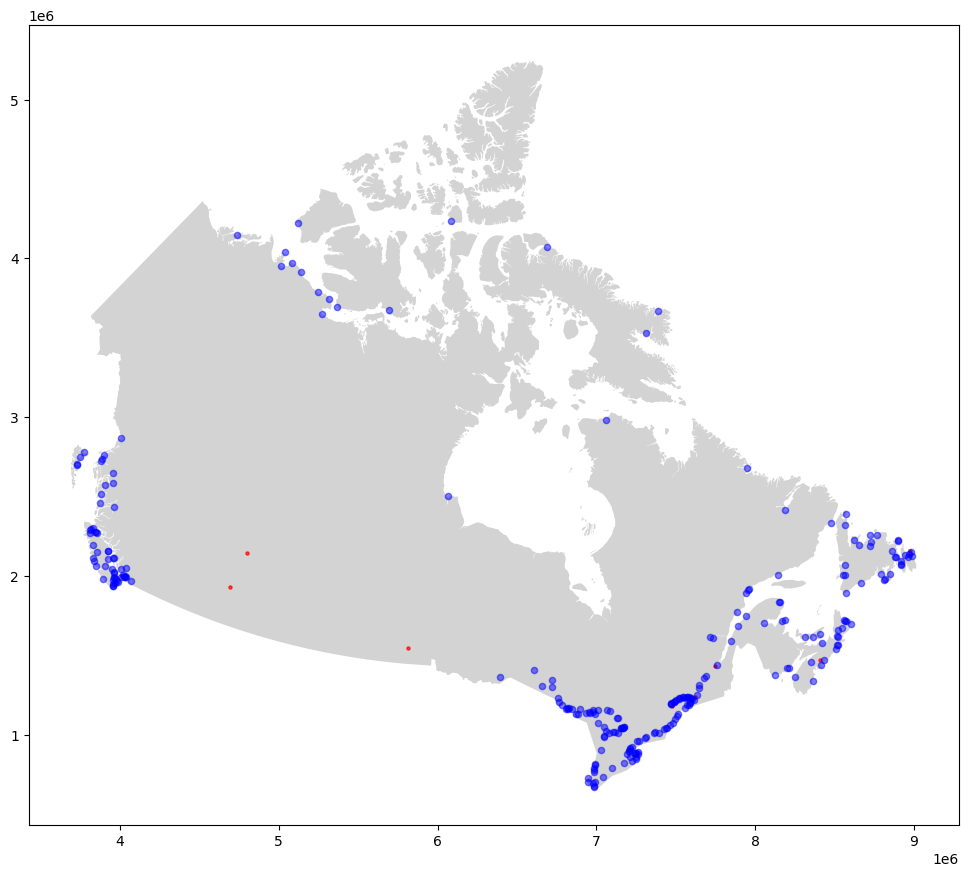

In [37]:
# subsetting
largeAirports=airports[airports['kind']=='large_airport'] #can't use "airports.type"
largeAirports.reset_index(drop=True, inplace=True)

#plotting
border_3348=border.to_crs('EPSG:3348')
ax_border_3348 = border_3348.plot(figsize=(12,12), color="lightgrey")

#base=largeAirports.plot(color='red',marker="^")
largeAirports.plot(marker='.', color='red', markersize=20,alpha=0.7,
                    ax=ax_border_3348)
seaports_ca_3348.plot(ax=ax_border_3348,color='blue',alpha=0.5,markersize=20)

In [38]:
seaports_ca_3348.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Port Severn,Canada,44.800000,-79.716667,POINT (7173072.517 1051168.567)
1,Little Bras D Or,Canada,46.250000,-60.300000,POINT (8562542.512 1720093.437)
2,Hilton,Canada,46.250000,-83.883333,POINT (6821113.408 1160541.743)
3,Kagawong,Canada,45.916667,-82.250000,POINT (6952951.262 1141032.434)
4,Douglastown,Canada,48.766667,-64.383333,POINT (8159882.703 1833158.849)


... and the large airports:

In [39]:
largeAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Vancouver International Airport,large_airport,49.193901,-123.183998,14.0,British Columbia,Vancouver,POINT (4010116.018 2000814.043)
1,Montreal / Pierre Elliott Trudeau Internationa...,large_airport,45.467837,-73.742294,118.0,Quebec,Montréal,POINT (7619517.695 1237036.43)
2,Calgary International Airport,large_airport,51.118822,-114.009933,3557.0,Alberta,Calgary,POINT (4692351.97 1928851.296)
3,Ottawa Macdonald-Cartier International Airport,large_airport,45.322498,-75.669197,374.0,Ontario,Ottawa,POINT (7476211.185 1180388.411)
4,Edmonton International Airport,large_airport,53.309700,-113.580002,2373.0,Alberta,Edmonton,POINT (4801168.181 2145905.166)


If both GDFs have **the same projected CRS**, we can use the *distance()* function. In this case, just two selected points:

In [40]:
# distance between 'Guarulhos' and 'Dtse / Gegua Oil Terminal'
largeAirports.iloc[0].geometry.distance(seaports_ca_3348.iloc[0].geometry)/1000  # in km

3302.4415728954127

What about computing all possible distances between those GDFs?

In [41]:
#try 1: default
seaports_ca_3348.geometry.apply\
(lambda g: largeAirports.geometry.distance(g)/1000)

,0,1,2,3,4,5,6,7,8
0,3302.441573,483.590901,2631.406735,329.531212,2612.351125,1444.727252,1301.342646,692.697378,2112.677200
1,4561.073452,1059.547014,3875.816646,1213.011651,3785.399911,2752.214044,297.366770,861.084115,599.258233
2,2933.899089,802.060374,2263.166991,655.398343,2247.469643,1076.746776,1614.402668,968.663306,2371.766184
3,3065.861003,673.444562,2393.943967,524.737877,2374.855708,1207.172718,1489.326542,849.537368,2261.464216
4,4153.152033,804.584539,3468.850880,945.259748,3373.243766,2361.551215,441.100433,571.870719,875.678351
...,...,...,...,...,...,...,...,...,...
257,4725.345429,1477.286146,4048.261209,1623.239849,3930.172796,2989.684911,811.021298,1250.617426,249.184504
258,3202.692559,1833.449783,2590.283570,1849.942280,2407.511799,1899.360189,2027.853934,1696.088193,2086.152267
259,3995.717503,1481.085098,3340.949944,1573.208591,3191.522283,2415.015021,1297.919233,1262.854463,1153.209763
260,4714.191953,1455.048380,4036.571953,1601.330776,3919.640519,2974.857233,786.655175,1228.912558,255.438213


In [42]:
# try 2: see names (change indexes)

seaports_ca_3348.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)

name,Vancouver International Airport,Montreal / Pierre Elliott Trudeau International Airport,Calgary International Airport,Ottawa Macdonald-Cartier International Airport,Edmonton International Airport,Winnipeg / James Armstrong Richardson International Airport,Halifax / Stanfield International Airport,Quebec Jean Lesage International Airport,St. John's International Airport
portName,,,,,,,,,
Port Severn,3302.441573,483.590901,2631.406735,329.531212,2612.351125,1444.727252,1301.342646,692.697378,2112.677200
Little Bras D Or,4561.073452,1059.547014,3875.816646,1213.011651,3785.399911,2752.214044,297.366770,861.084115,599.258233
Hilton,2933.899089,802.060374,2263.166991,655.398343,2247.469643,1076.746776,1614.402668,968.663306,2371.766184
Kagawong,3065.861003,673.444562,2393.943967,524.737877,2374.855708,1207.172718,1489.326542,849.537368,2261.464216
Douglastown,4153.152033,804.584539,3468.850880,945.259748,3373.243766,2361.551215,441.100433,571.870719,875.678351
...,...,...,...,...,...,...,...,...,...
Lewisporte,4725.345429,1477.286146,4048.261209,1623.239849,3930.172796,2989.684911,811.021298,1250.617426,249.184504
Deception Bay,3202.692559,1833.449783,2590.283570,1849.942280,2407.511799,1899.360189,2027.853934,1696.088193,2086.152267
Nain,3995.717503,1481.085098,3340.949944,1573.208591,3191.522283,2415.015021,1297.919233,1262.854463,1153.209763


In [43]:
#try 3: reorder previous output

seaports_ca_3348.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Calgary International Airport,Edmonton International Airport,Halifax / Stanfield International Airport,Montreal / Pierre Elliott Trudeau International Airport,Ottawa Macdonald-Cartier International Airport,Quebec Jean Lesage International Airport,St. John's International Airport,Vancouver International Airport,Winnipeg / James Armstrong Richardson International Airport
portName,,,,,,,,,
Ahousat,879.295703,969.232672,4618.958816,3886.947853,3761.105798,3976.244769,5141.626980,209.945171,2062.639348
Alert Bay,904.306408,954.921080,4621.950511,3904.036911,3781.910919,3984.571952,5121.080448,309.506427,2090.322226
Alliford Bay,1233.511420,1206.238047,4836.066445,4155.752790,4042.897510,4215.188145,5272.208932,753.622916,2383.902437
Amherstburg,2566.366019,2585.973800,1648.155564,859.905304,713.887028,1087.336497,2494.947903,3210.772455,1411.095270
Argentia,4227.513699,4116.866875,792.983629,1543.988346,1695.401127,1330.680534,99.999156,4907.815552,3146.040186
...,...,...,...,...,...,...,...,...,...
Whycocomagh,3836.977824,3750.264762,225.031487,995.408489,1149.233079,802.473766,671.296577,4522.635998,2706.610977
Wiarton,2535.849291,2523.119304,1415.210472,596.683775,442.605973,800.867059,2221.487321,3203.771220,1350.474971
Windsor,2556.271785,2573.723724,1634.560770,842.589208,695.457298,1068.759294,2478.442974,3202.608614,1397.839440


Let's keep the last one:

In [44]:
distanceMatrixKM_sea_air= seaports_ca_3348.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

This a data frame (pandas), and the names of the facilities are row and column indexes. From this distance matrix we can make some key queries:

In [45]:
# the mean distance from a seaport to all the large airports (sorted)
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True) #axis=0?

,0
portName,
Montebello,1580.476484
Thurso,1580.488652
Fassett,1580.783251
Papineauville,1580.931790
Rockland,1581.482329
...,...
Pearce Point,3137.665585
Paulatuk,3146.928173
Police Point,3209.687030


Let's compute more stats:

In [46]:
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)

# see some
SomeStats.head(10)

,mean,min,max
portName,,,
Ahousat,2833.999679,209.945171,5141.626980
Alert Bay,2852.511876,309.506427,5121.080448
Alliford Bay,3122.154294,753.622916,5272.208932
Amherstburg,1842.048871,713.887028,3210.772455
Argentia,2429.032122,99.999156,4907.815552
Arnold's Cove,2417.797210,94.185708,4879.628741
Baie Comeau,1746.208424,365.926751,3883.687243
Baie Verte,2283.750489,360.201140,4616.510134
Bamberton,2695.228488,75.688651,5023.594122


We can also use **idxmax** to get the particular locations:

In [47]:
# farthest airport to each seaport
distanceMatrixKM_sea_air.idxmax(axis=1)

,0
portName,
Ahousat,St. John's International Airport
Alert Bay,St. John's International Airport
Alliford Bay,St. John's International Airport
Amherstburg,Vancouver International Airport
Argentia,Vancouver International Airport
...,...
Whycocomagh,Vancouver International Airport
Wiarton,Vancouver International Airport
Windsor,Vancouver International Airport


In [48]:
# farthest seaport to each airport
distanceMatrixKM_sea_air.idxmax(axis=0)

,0
name,
Calgary International Airport,Bay Bulls
Edmonton International Airport,Bay Bulls
Halifax / Stanfield International Airport,Queen Charlotte
Montreal / Pierre Elliott Trudeau International Airport,Queen Charlotte
Ottawa Macdonald-Cartier International Airport,Queen Charlotte
Quebec Jean Lesage International Airport,Queen Charlotte
St. John's International Airport,Queen Charlotte
Vancouver International Airport,Bay Bulls
Winnipeg / James Armstrong Richardson International Airport,Bay Bulls


In [49]:
# closest airport to each seaport
distanceMatrixKM_sea_air.idxmin(axis=1)

,0
portName,
Ahousat,Vancouver International Airport
Alert Bay,Vancouver International Airport
Alliford Bay,Vancouver International Airport
Amherstburg,Ottawa Macdonald-Cartier International Airport
Argentia,St. John's International Airport
...,...
Whycocomagh,Halifax / Stanfield International Airport
Wiarton,Ottawa Macdonald-Cartier International Airport
Windsor,Ottawa Macdonald-Cartier International Airport


In [50]:
# closest seaport to each airport
distanceMatrixKM_sea_air.idxmin(axis=0)

,0
name,
Calgary International Airport,Mission City
Edmonton International Airport,Mission City
Halifax / Stanfield International Airport,Halifax
Montreal / Pierre Elliott Trudeau International Airport,Montreal
Ottawa Macdonald-Cartier International Airport,Hull
Quebec Jean Lesage International Airport,Quebec
St. John's International Airport,St John's
Vancouver International Airport,Steveston
Winnipeg / James Armstrong Richardson International Airport,Thunder Bay


### Exercise 2

<div class="alert-success">
    
1. Use a map of points and a map of lines from your country.

2. Compute the distance matrix for both.

3. Select one line of the distance matrix, and plot the closests and the farthest point to that line.
    
    
</div>

## Distance between line and point

Let's take a look at the rivers we have:

In [51]:
rivers.head()

,NAME,SYSTEM,geometry
0,Niagara,None,"MULTILINESTRING ((6999631.51 767821.1, 7013833..."
1,Koukdjuak,None,"MULTILINESTRING ((7072139.098 3493107.414, 707..."
2,St. Lawrence,None,"MULTILINESTRING ((7792332.181 1443422.163, 775..."
3,St. Clair,None,"MULTILINESTRING ((6999631.51 767821.1, 7002240..."
4,Columbia,None,"MULTILINESTRING ((4371521.645 1803207.591, 438..."


In [52]:
#keep one:

rivers[rivers.NAME.str.contains('Niagara')]

,NAME,SYSTEM,geometry
0,Niagara,None,"MULTILINESTRING ((6999631.51 767821.1, 7013833..."


You can see that distance works between these two elements:

In [53]:
# distance from each airport to Rio Grande
rivers[rivers.NAME.str.contains('Niagara')].iloc[0].geometry.distance(largeAirports.set_index('name').geometry)/1000

,geometry
name,
Vancouver International Airport,3213.221992
Montreal / Pierre Elliott Trudeau International Airport,511.805708
Calgary International Airport,2565.286518
Ottawa Macdonald-Cartier International Airport,379.748079
Edmonton International Airport,2577.755285
Winnipeg / James Armstrong Richardson International Airport,1399.782431
Halifax / Stanfield International Airport,1284.131454
Quebec Jean Lesage International Airport,746.445351
St. John's International Airport,2137.411468


Based on what we did previously, let's compute all the distances:

In [54]:
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

name,Calgary International Airport,Edmonton International Airport,Halifax / Stanfield International Airport,Montreal / Pierre Elliott Trudeau International Airport,Ottawa Macdonald-Cartier International Airport,Quebec Jean Lesage International Airport,St. John's International Airport,Vancouver International Airport,Winnipeg / James Armstrong Richardson International Airport
NAME,,,,,,,,,
Columbia,143.315448,297.956569,3876.722405,3134.373239,3006.831913,3229.771716,4430.656173,383.853870,1307.161551
Dauphin,1012.198028,966.925246,2623.560219,1871.318412,1744.439863,1971.968503,3200.420198,1697.653366,64.329643
Great Bear,1547.652458,1319.736542,3881.235282,3386.348227,3319.759298,3361.424533,4087.263888,1715.152695,2072.744013
Koukdjuak,2788.905912,2580.044534,2363.515812,2262.974911,2290.700912,2107.910477,2245.930288,3343.428316,2277.214133
Mackenzie,1069.530155,831.876746,3416.889808,2882.805296,2809.791761,2870.841571,3704.881204,1118.374221,1558.764369
Nelson,1036.986115,954.125499,2405.118368,1758.956082,1634.015220,1820.670785,2826.120129,1720.892244,76.738672
Niagara,2565.286518,2577.755285,1284.131454,511.805708,379.748079,746.445351,2137.411468,3213.221992,1399.782431
Nipigon,1767.388204,1727.249757,1917.418075,1159.354224,1031.656883,1265.323707,2555.669522,2449.527900,597.565549
Peace,586.448154,392.122690,3491.858763,2878.730814,2786.488819,2901.470092,3874.452369,665.191725,1334.049404


Here, we see one row (river), that tells the distance to each column (large airport):

In [55]:
distanceMatrixKM_riv_air.loc['Niagara'].sort_values()

,Niagara
name,
Ottawa Macdonald-Cartier International Airport,379.748079
Montreal / Pierre Elliott Trudeau International Airport,511.805708
Quebec Jean Lesage International Airport,746.445351
Halifax / Stanfield International Airport,1284.131454
Winnipeg / James Armstrong Richardson International Airport,1399.782431
St. John's International Airport,2137.411468
Calgary International Airport,2565.286518
Edmonton International Airport,2577.755285
Vancouver International Airport,3213.221992


Let's try a simple plot of the river and the airports:

In [56]:
base=largeAirports.explore(color='red',marker_kwds=dict(radius=10))
rivers[rivers.NAME.str.contains('Niagara')].explore(m=base)

Now, let's focus on the rivers that belong to a system:

In [57]:
rivers[~rivers.SYSTEM.isna()]

,NAME,SYSTEM,geometry
10,Peace,Mackenzie,"MULTILINESTRING ((4335082.606 2686747.386, 433..."
11,Slave,Mackenzie,"MULTILINESTRING ((5137507.42 2670813.888, 5147..."
13,Mackenzie,Mackenzie,"MULTILINESTRING ((5096750.624 2964398.029, 512..."
14,Great Bear,Mackenzie,"MULTILINESTRING ((4832495.383 3541470.88, 4879..."


Let's dissolve the ones that belong to a system into a multiline:

In [58]:
systems=rivers.dissolve(by='SYSTEM')
systems

,geometry,NAME
SYSTEM,,
Mackenzie,"MULTILINESTRING ((4335082.606 2686747.386, 433...",Peace


Let's do some basic formatting:

In [59]:
# format the GDF:

systems.reset_index(drop=False,inplace=True)
systems.drop(columns='NAME',inplace=True)

# we have
systems

,SYSTEM,geometry
0,Mackenzie,"MULTILINESTRING ((4335082.606 2686747.386, 433..."


Another distance matrix:

In [60]:
distanceMatrixKM_sys_air=systems.set_index('SYSTEM').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

name,Calgary International Airport,Edmonton International Airport,Halifax / Stanfield International Airport,Montreal / Pierre Elliott Trudeau International Airport,Ottawa Macdonald-Cartier International Airport,Quebec Jean Lesage International Airport,St. John's International Airport,Vancouver International Airport,Winnipeg / James Armstrong Richardson International Airport
SYSTEM,,,,,,,,,
Mackenzie,586.448154,392.12269,3196.844854,2599.725555,2513.080248,2613.750694,3573.330542,665.191725,1163.462223


This time, let me get all the minimum distances:

In [61]:
mins=distanceMatrixKM_sys_air.idxmin(axis="columns") # same as axis=1
mins

,0
SYSTEM,
Mackenzie,Edmonton International Airport


In [62]:
# one of them
mins.iloc[0]

'Edmonton International Airport'

Let's see now:

In [63]:
base=systems.explore()
# the closest
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# NOT the closest
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

### Exercise 3

<div class="alert-success">
    
1. Create a HULL for some set of line map.

2. Compute the distance matrix between the HULLS and a map of points.

3. Plot the HULLS and the points. Show the closest and farthest points to the HULL.
    
</div>    

## Polygon to point

Let me create some **convex hull**s for our Brazilian system of rivers:

In [64]:
# polygon for each system
systems.convex_hull

,0
0,"POLYGON ((4663155.925 2514572.244, 4339678.675..."


<Axes: >

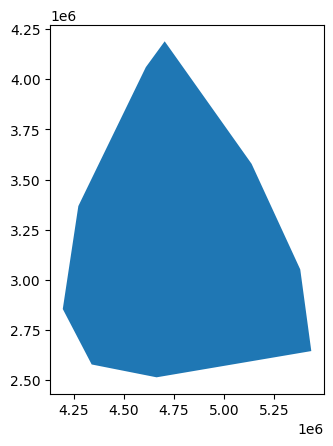

In [65]:
# see them
systems.convex_hull.plot()

Now, a GDF for the hulls:

In [66]:
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=['Mackenzie']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:3348"
systems_hulls

,geometry,system
0,"POLYGON ((4663155.925 2514572.244, 4339678.675...",Mackenzie


Next, the distance matrix:

In [67]:
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

name,Calgary International Airport,Edmonton International Airport,Halifax / Stanfield International Airport,Montreal / Pierre Elliott Trudeau International Airport,Ottawa Macdonald-Cartier International Airport,Quebec Jean Lesage International Airport,St. John's International Airport,Vancouver International Airport,Winnipeg / James Armstrong Richardson International Airport
system,,,,,,,,,
Mackenzie,586.448154,386.55679,3196.844854,2599.725555,2513.080248,2613.750694,3573.330542,665.191725,1163.462223


All the minimal differences:

In [68]:
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

,0
system,
Mackenzie,Edmonton International Airport


In [69]:
# plotting
base=systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

### Exercise 4

<div class="alert-success">
    
1. Select a line map and a point one.

2. Get the buffer for the lines, select a distance.

3. Keep the points that are within the buffer (you might need to play with differn distances until you show something interesting.  
    
</div>   

## Distances using _Buffers_

A very important case in distance analysis is the use of buffers:

In [70]:
# remember:
distanceMatrixKM_riv_air

name,Calgary International Airport,Edmonton International Airport,Halifax / Stanfield International Airport,Montreal / Pierre Elliott Trudeau International Airport,Ottawa Macdonald-Cartier International Airport,Quebec Jean Lesage International Airport,St. John's International Airport,Vancouver International Airport,Winnipeg / James Armstrong Richardson International Airport
NAME,,,,,,,,,
Columbia,143.315448,297.956569,3876.722405,3134.373239,3006.831913,3229.771716,4430.656173,383.853870,1307.161551
Dauphin,1012.198028,966.925246,2623.560219,1871.318412,1744.439863,1971.968503,3200.420198,1697.653366,64.329643
Great Bear,1547.652458,1319.736542,3881.235282,3386.348227,3319.759298,3361.424533,4087.263888,1715.152695,2072.744013
Koukdjuak,2788.905912,2580.044534,2363.515812,2262.974911,2290.700912,2107.910477,2245.930288,3343.428316,2277.214133
Mackenzie,1069.530155,831.876746,3416.889808,2882.805296,2809.791761,2870.841571,3704.881204,1118.374221,1558.764369
Nelson,1036.986115,954.125499,2405.118368,1758.956082,1634.015220,1820.670785,2826.120129,1720.892244,76.738672
Niagara,2565.286518,2577.755285,1284.131454,511.805708,379.748079,746.445351,2137.411468,3213.221992,1399.782431
Nipigon,1767.388204,1727.249757,1917.418075,1159.354224,1031.656883,1265.323707,2555.669522,2449.527900,597.565549
Peace,586.448154,392.122690,3491.858763,2878.730814,2786.488819,2901.470092,3874.452369,665.191725,1334.049404


In [71]:
# getting a value (it can be any value)
distanceMatrixKM_riv_air.loc['Mackenzie'].min() # I chose min

831.876745609332

We can use any value to create a buffer:

In [72]:
minMts=distanceMatrixKM_riv_air.loc['Mackenzie'].min()*1000 # km

#the buffer is a polygon:
rivers[rivers.NAME=='Mackenzie'].buffer(distance = minMts)

,0
13,"POLYGON ((3502373.79 3058143.092, 3488147.919 ..."


In [73]:
# see buffer:
bufferAroundMackenzie=rivers[rivers.NAME=='Mackenzie'].buffer(distance = minMts)
bufferAsBase=bufferAroundMackenzie.explore(color='red')
rivers[rivers.NAME=='Mackenzie'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

Above we used the buffer (red polygon), and the river (blue). Let me add a layer of airports (small ones):

In [74]:
small_airports=airports[airports['kind']=='small_airport']

# plotting
rivers[rivers.NAME=='Mackenzie'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=bufferAsBase,color='black')

Now, we can use the buffer (polygon) to keep the airports that are at that particular distance around the river:

In [75]:

riversWithinBuffer=small_airports.clip(mask=bufferAroundMackenzie)
#
riversWithinBuffer

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
1237,Big Sand Lake Airport,small_airport,57.619400,-99.875298,1050.0,Manitoba,Big Sand Lake,POINT (5734350.197 2404438.114)
521,Brochet Airport,small_airport,57.889400,-101.679001,1136.0,Manitoba,Brochet,POINT (5634738.871 2448099.898)
534,Tadoule Lake Airport,small_airport,58.706308,-98.511057,923.0,Manitoba,Tadoule Lake,POINT (5825656.263 2512642.609)
452,Lac Brochet Airport,small_airport,58.614279,-101.468954,1211.0,Manitoba,Lac Brochet,POINT (5658578.457 2524035.484)
840,Seal River Airstrip,small_airport,59.154598,-94.785554,20.0,Manitoba,Churchill,POINT (6037539.005 2545410.386)
...,...,...,...,...,...,...,...,...
1337,Wiley Airport,small_airport,66.491096,-136.572998,2365.0,Yukon,Eagle Plains,POINT (4423691.177 3986461.067)
335,Fort Mcpherson Airport,small_airport,67.406993,-134.860182,116.0,Northwest Territories,Fort Mcpherson,POINT (4542810.92 4016731.477)
520,Aklavik/Freddie Carmichael Airport,small_airport,68.223297,-135.005990,23.0,Northwest Territories,Aklavik,POINT (4593568.156 4089404.744)
286,Old Crow Airport,small_airport,67.570602,-139.839005,824.0,Yukon,Old Crow,POINT (4398431.145 4165558.131)


In [76]:
# plotting the airports within buffer
bufferAsBase=bufferAroundMackenzie.explore(color='red')
rivers[rivers.NAME=='Mackenzie'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

In [77]:
# minimum of all the minimum by row
distanceMatrixKM_riv_air.min(axis=1).min()

4.56252340575977

In [78]:
# using the previous value
minMinMts_5=5*distanceMatrixKM_riv_air.min(axis=1).min()*1000


allMinBuffer=rivers.buffer(distance = minMinMts_5).explore(color='red')
rivers.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})

In [79]:
# you see all the buffer polygons:
riversAll_buf=rivers.buffer(distance = minMinMts_5)
riversAll_buf

,0
0,"POLYGON ((6944700.213 748951.31, 6945562.824 7..."
1,"POLYGON ((7005607.361 3466049.61, 7003368.855 ..."
2,"MULTIPOLYGON (((7595992.735 1233461.974, 75950..."
3,"POLYGON ((6385278.855 1357573.931, 6395550.241..."
4,"POLYGON ((4365634.507 1825341.223, 4369230.079..."
5,"POLYGON ((6395506.985 1510568.05, 6394912.296 ..."
6,"POLYGON ((5699157.435 1703190.572, 5698772.239..."
7,"POLYGON ((5631803.305 1866537.408, 5629753.346..."
8,"POLYGON ((5587957.295 2008522.439, 5565535.004..."
9,"POLYGON ((5725567.403 1891697.04, 5724672.714 ..."


Now keep small airports in buffer:

In [80]:
allRiversWithinBuffs=small_airports.clip(riversAll_buf)
allRiversWithinBuffs

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
415,Leamington Airport,small_airport,42.025002,-82.525002,576.0,Ontario,Leamington,POINT (6996293.004 700353.243)
1405,Harrow Airport,small_airport,42.059399,-82.840797,610.0,Ontario,Harrow,POINT (6969000.284 700372.651)
1364,Essex Airport,small_airport,42.095798,-82.879402,620.0,Ontario,Essex,POINT (6965145.17 704040.487)
1310,Cottam Airport,small_airport,42.139999,-82.652802,635.0,Ontario,Cottam,POINT (6983572.003 711816.324)
1455,Essex/Billing Airstrip,small_airport,42.186668,-82.782219,630.0,Ontario,Lakeshore,POINT (6971879.872 715529.307)
...,...,...,...,...,...,...,...,...
1550,Pelly Crossing Airport,small_airport,62.837509,-136.528151,1870.0,Yukon,Pelly Crossing,POINT (4170076.944 3683674.394)
1164,Minto,small_airport,62.604722,-137.221944,2969.0,Yukon,None,POINT (4127565.545 3686926.736)
1383,Fort Selkirk Airport,small_airport,62.768300,-137.384704,1501.0,Yukon,Fort Selkirk,POINT (4133041.266 3705581.592)
874,Great Bear Lake Airport,small_airport,66.703053,-119.716816,562.0,Northwest Territories,Great Bear Lake,POINT (5044588.859 3615180.152)


<Axes: >

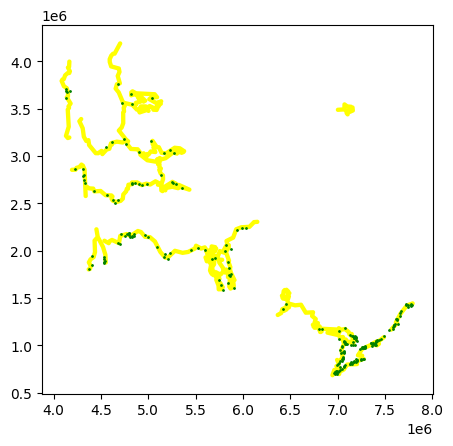

In [81]:
# simple
base=riversAll_buf.plot(color='yellow')
allRiversWithinBuffs.plot(ax=base, color='green', markersize=1)

In [82]:
# folium

base=riversAll_buf.explore(color='yellow')
allRiversWithinBuffs.explore(m=base, color='green')

### Exercise 5

<div class="alert-success">
    
1. Get a polygons map of the lowest administrative unit possible.
    
2. Get a table of variables for those units. At least 3 numerical variables.

3. Preprocess both tables and get them ready for merging.

4. Do the merging, making the changes needed so that you keep the most columns.
    
    
</div>

In [ ]:
import geopandas as gpd

peruMapaDistLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/maps/DistritosMap.zip"

mapdis=gpd.read_file(peruMapaDistLink)

mapdis.plot()

In [ ]:
mapdis

In [ ]:
import pandas as pd
import os

peruDataLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/dataPeru_indicadores.xlsx"
datadis=pd.read_excel(peruDataLink,
                     dtype={'Ubigeo': object})
datadis

In [ ]:
#Formatear y limpiar: Eliminando espacios y convirtiendo "Provincia" y "Distrito" en mayúscula
capitalizeColumns=lambda x: x.str.upper().str.strip()
datadis[['Provincia','Distrito']]=datadis[['Provincia','Distrito']].apply(capitalizeColumns)
mapdis[['PROVINCIA','DISTRITO']]=mapdis[['PROVINCIA','DISTRITO']].apply(capitalizeColumns)
datadis

In [ ]:
!pip install unidecode

In [ ]:
#Eliminar caracteres que puede causar problemas
import unidecode


byePunctuation=lambda x: unidecode.unidecode(x)
datadis[['Provincia','Distrito']]=datadis[['Provincia','Distrito']].map(byePunctuation)
mapdis[['PROVINCIA','DISTRITO']]=mapdis[['PROVINCIA','DISTRITO']].map(byePunctuation)

In [ ]:
#Verificar si hay duplicados
datadis.Distrito.duplicated().sum(),mapdis.DISTRITO.duplicated().sum()

In [ ]:
#Sí hay, entonces crearmos columna con nombre únicos
datadis['provDist']=["+".join(pd) for pd in zip (datadis.Provincia,datadis.Distrito)]
mapdis['provDist']=["+".join(pd) for pd in zip (mapdis.PROVINCIA,mapdis.DISTRITO)]

datadis['provDist']

In [ ]:
#¿Cuántos no están escrito igual?
nomatch_df=set(datadis.provDist)- set(mapdis.provDist)
nomatch_gdf=set(mapdis.provDist)-set(datadis.provDist)
len(nomatch_df), len(nomatch_gdf)

In [ ]:
!pip install thefuzz

In [ ]:
# Se elige reemplazar los de mayor coincidencia en nomatch_df
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

In [ ]:
#Diccionario para reemplazar
changesDis_df={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}
changesDis_df

In [ ]:
#Se reemplaza
datadis.replace({'provDist':changesDis_df},inplace=True)

In [ ]:
#Se hace el merge entre mapdis y datadis
datadisMap=mapdis.merge(datadis, on='provDist')

datadisMap

In [ ]:
#Extraer el distrito y 3 variables numéricas

var_distrito = datadisMap.iloc[:, [5,10,11,12]]
var_distrito

In [ ]:
#Verificar número de filas
var_distrito.shape

### Exercise 6

<div class="alert-success">
        
Compute the neighbors of the capital of your country. Plot the results for each of the options.
    
</div>

In [ ]:
#verificamos la data en un histograma
import seaborn as sea

sea.histplot(datadisMap.IDH2019, color='yellow')

In [ ]:
!pip install mapclassify

In [ ]:
indice_lima = datadisMap[datadisMap.PROVINCIA == "LIMA"].index[0]

In [ ]:
indice_lima

In [103]:
primera_geometria_lima = datadisMap[datadisMap.PROVINCIA == "LIMA"].head(1)

In [104]:
primera_geometria_lima

,DEPARTAMEN,PROVINCIA,DISTRITO,INSTITUCIO,geometry,provDist,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
1824,LIMA,LIMA,SANTA ROSA,IGN,"POLYGON ((-77.18443 -11.78003, -77.15744 -11.7...",LIMA+SANTA ROSA,150139,Lima,LIMA,SANTA ROSA,20112,21.35,0.660577,67.61856,26.5,1.3


# CÁLCULO DE LOS NEIGHBORS DE LIMA PARA LA TRES OPCIONES

In [105]:
#opción 1: The polygons that share borders:

In [106]:
!pip install libpysal

In [107]:
from libpysal.weights import Queen, Rook, KNN

# rook
w_rook = Rook.from_dataframe(datadisMap,use_index=False)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 89, 122.
  W.__init__(self, neighbors, ids=ids, **kw)


In [108]:
w_rook.islands

[89, 122]

<Axes: >

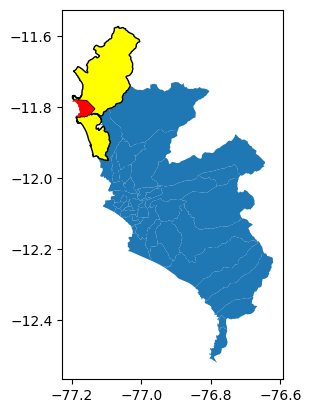

In [109]:
# Cambiar "TACNA" por la provincia deseada, "LIMA"
base = datadisMap[datadisMap.PROVINCIA == "LIMA"].plot()
datadisMap.iloc[w_rook.neighbors[1824], ].plot(ax=base, facecolor="yellow", edgecolor="k")
primera_geometria_lima.plot(ax=base, facecolor="red")

In [110]:
#opción 2: The polygons that share at least a point:

In [111]:
# queen
w_queen = Queen.from_dataframe(datadisMap,use_index=False)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 89, 122.
  W.__init__(self, neighbors, ids=ids, **kw)


In [112]:
w_queen.islands

[89, 122]

In [113]:
datadisMap.iloc[w_queen.islands,:].explore()

In [114]:
len(w_queen.neighbors[1824
])

2

In [115]:
datadisMap.iloc[w_queen.neighbors[1824
] ,]

,DEPARTAMEN,PROVINCIA,DISTRITO,INSTITUCIO,geometry,provDist,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
1826,CALLAO,CALLAO,VENTANILLA,IGN,"POLYGON ((-77.13521 -11.81782, -77.13516 -11.8...",CALLAO+VENTANILLA,070106,Callao,CALLAO,VENTANILLA,402038,69.93,0.600316,69.088719,20.3,1.0
1870,LIMA,LIMA,ANCON,IGN,"POLYGON ((-77.06501 -11.57523, -77.06499 -11.5...",LIMA+ANCON,150102,Lima,LIMA,ANCON,42124,285.45,0.668889,72.117976,21.7,1.1


<Axes: >

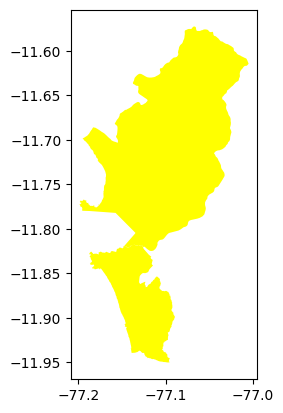

In [116]:
datadisMap.iloc[w_queen.neighbors[1824
] ,].plot(facecolor="yellow")

<Axes: >

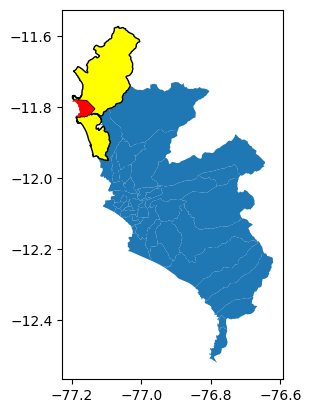

In [117]:
base=datadisMap[datadisMap.PROVINCIA=="LIMA"].plot()
datadisMap.iloc[w_queen.neighbors[1824] ,].plot(ax=base,facecolor="yellow",edgecolor='k')
primera_geometria_lima.plot(ax=base,facecolor="red")

In [118]:
#opción 3: NEIGHBORS MÁS CERCANOS

In [119]:
# k=8 nearest neighbors
w_knn8 = KNN.from_dataframe(datadisMap, k=8)

In [120]:
w_knn8.islands

[]

In [121]:
w_knn8.neighbors[1824]

[1872, 1826, 1825, 1870, 1829, 1830, 1871, 1831]

<Axes: >

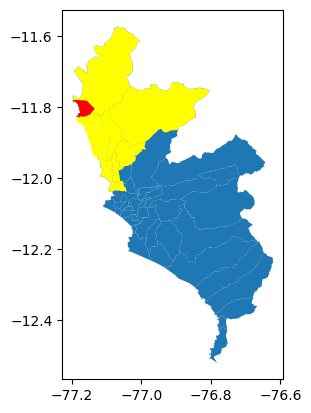

In [122]:
base=datadisMap[datadisMap.PROVINCIA=="LIMA"].plot()
datadisMap.iloc[w_knn8.neighbors[1824],].plot(ax=base,facecolor="yellow")
primera_geometria_lima.plot(ax=base,facecolor="red")